In [32]:
import calendar
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
import warnings
warnings.filterwarnings('ignore')
register_matplotlib_converters()

In [17]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('../data/fcc-forum-pageviews.csv',
                 parse_dates=['date'], index_col=['date'])

In [18]:
# Display the data
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [19]:
# Observe the structure of data
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1304 entries, 2016-05-09 to 2019-12-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   1304 non-null   int64
dtypes: int64(1)
memory usage: 20.4 KB


In [20]:
print(f'Total no. of records: {df.shape[0]}')
print(f'Total no. of dimensions: {df.shape[1]}')

Total no. of records: 1304
Total no. of dimensions: 1


In [21]:
# Checking for null values
print(f'Total no. of missing values in data: {df.isnull().sum().iloc[0]}')

Total no. of missing values in data: 0


In [22]:
# Removing outliers
df = df[(df['value']>=df['value'].quantile(0.025))&(df['value']<=df['value'].quantile(0.975))]

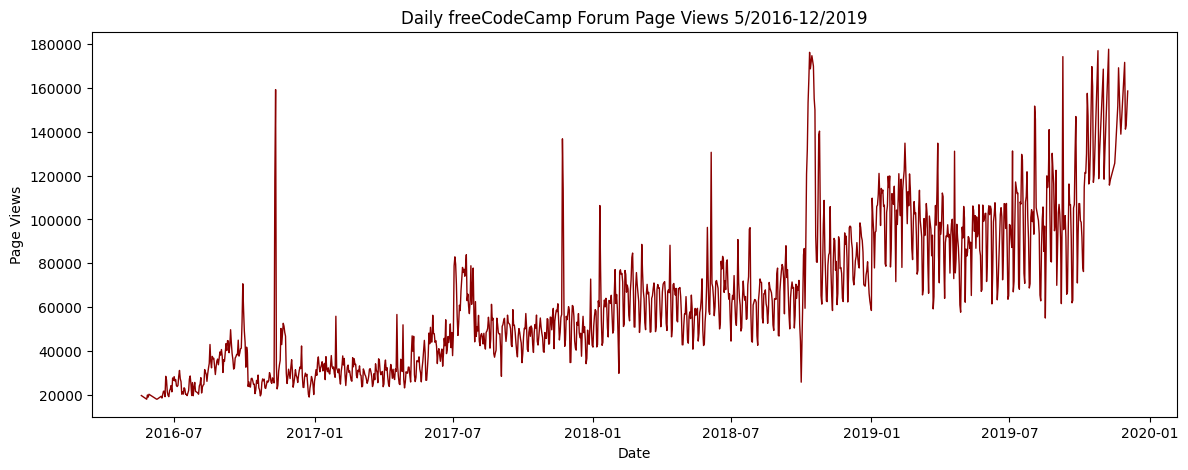

In [33]:
# Plotting a line plot to observe the change in trend over time.
def draw_line_plot():
    # Draw line plot
    fig,ax=plt.subplots(figsize=(14,5))
    ax.plot(df.index
    ,df['value'],
    color='darkred',
    linewidth=1)
    ax.set_xlabel('Date')
    ax.set_ylabel('Page Views')
    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    plt.show()
draw_line_plot()

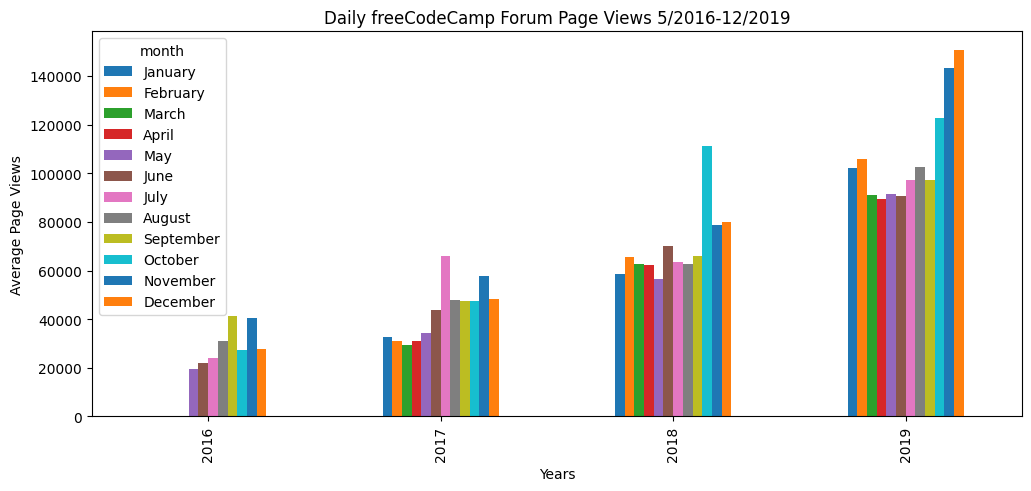

In [38]:
# Plotting a bar plot to compare the net page views per month.
def draw_bar_plot():
    
    # Copy and modify data for monthly bar plot
    df_bar = df.copy()
    df_bar['year'] = df_bar.index.year
    months = [month for month in calendar.month_name if month != ""]
    df_bar['month'] = df_bar.index.month
    df_bar['month'] = df_bar['month'].apply(lambda month: months[month-1])
    df_bar['month'] = pd.Categorical(df_bar["month"], categories=months)
    df_bar = pd.pivot_table(
        df_bar,
        values="value",
        index="year",
        columns="month",
        aggfunc=np.mean
    )

    # Draw bar plot
    ax = df_bar.plot(kind='bar')
    fig = ax.get_figure()
    fig.set_size_inches(12, 5)
    ax.set_xlabel("Years")
    ax.set_ylabel("Average Page Views")
    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    plt.show()
draw_bar_plot()

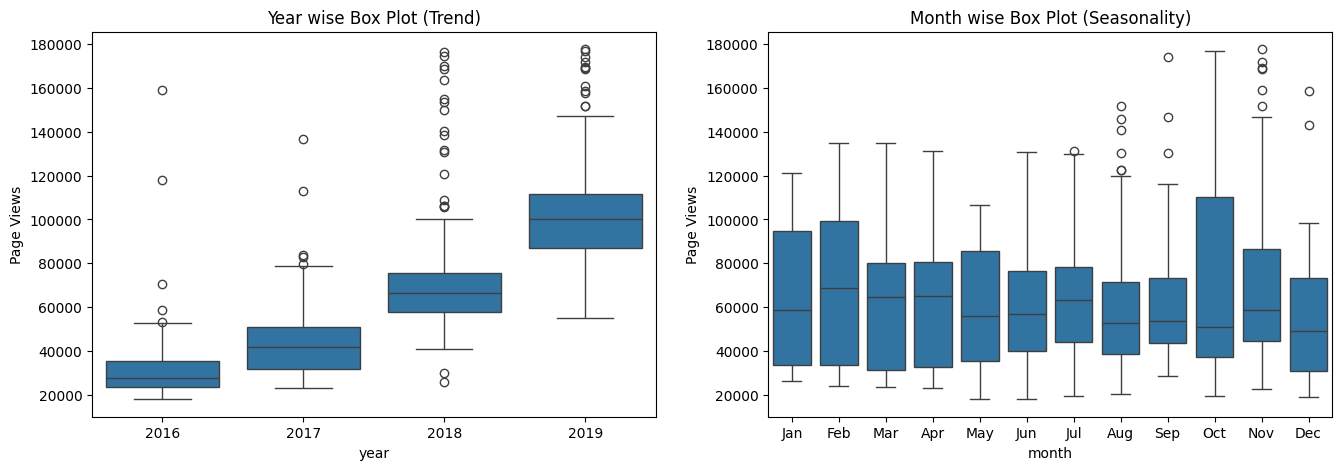

In [40]:
# Plotting a box plot to observe the distribution of the data over time.
def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]
    # df_box['month'] = 
    # Draw box plots (using Seaborn)
    fig,ax = plt.subplots(ncols=2,figsize=(16,5))
    sns.boxplot(
        data=df_box,
        x = df_box['year'],
        y = df_box['value'],
        orient="v",
        ax=ax[0],
        linewidth=1
        ,
        ).set(
            title = "Year wise Box Plot (Trend)",
            ylabel = "Page Views"
        )
    sns.boxplot(
        data=df_box,
        x = df_box['month'],
        y = df_box['value'],
        orient="v",
        ax=ax[1],
        linewidth=1,
        order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
        ).set(
            title = "Month wise Box Plot (Seasonality)",
            ylabel = "Page Views"
        )

    plt.show()
draw_box_plot()